# Zadanie 2 - Eksploracyjna analiza danych

Przedstaw w ciekawy sposób opis i wizyalizację danych zebranych w analizowanym zbiorze. \
W tym celu wykonaj poszczególne kroki oraz odpowiedz na postawione pytania badawcze.

##Utwórz kopię pliku na swoim dysku google. Zmień nazwę na R_Zadanie_2_imię_nazwisko.jpynb

## Zaimportuj pakiet Tidiverse

In [1]:
library(tidyverse)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.6     ✔ dplyr   1.0.8
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



##Wczytaj plik
przygotowany na poprzednich zajęciach new_cocoa_imie_nazwisko.csv

In [2]:
df <- read.csv("new_cocoa_Szymon_Dernoga.csv")
head(df)

,Company,Specific_Bean_Origin_or_Bar_Name,REF,Review_Date,Cocoa_Percentage,Company_Location,Rating,Broad_Bean_Origin,Chocolate_Type
,<chr>,<chr>,<int>,<int>,<int>,<chr>,<dbl>,<chr>,<chr>
1,A. Morin,Agua Grande,1876,2016,63,France,3.75,Sao Tome,Deserowa
2,A. Morin,Kpime,1676,2015,70,France,2.75,Togo,Deserowa
3,A. Morin,Atsane,1676,2015,70,France,3.00,Togo,Deserowa
4,A. Morin,Akata,1680,2015,70,France,3.50,Togo,Deserowa
5,A. Morin,Quilla,1704,2015,70,France,3.50,Peru,Deserowa
6,A. Morin,Carenero,1315,2014,70,France,2.75,Venezuela,Deserowa


## Statystyki opisowe i tabele liczności

Oblicz postawowe statystyki opisowe dla zmiennych numerycznych oraz tabele liczności dla zmiennych **kategorycznych**

In [3]:
# Obliczenie podstawowych statystyk opisowych dla zmiennych numerycznych
numeryczne <- df[, sapply(df, is.numeric)]
summary(numeryczne)

# Wyświetlenie tabeli liczności dla zmiennych kategorycznych
kategoryczne <- df[, sapply(df, is.character)]
for (col in colnames(kategoryczne)) {
  cat("Tabela liczności dla zmiennej", col, ":\n")
  print(table(kategoryczne[[col]]))
  cat("\n")
}

      REF        Review_Date   Cocoa_Percentage     Rating     
 Min.   :   5   Min.   :2006   Min.   : 42.0    Min.   :1.000  
 1st Qu.: 576   1st Qu.:2010   1st Qu.: 70.0    1st Qu.:2.875  
 Median :1069   Median :2013   Median : 70.0    Median :3.250  
 Mean   :1036   Mean   :2012   Mean   : 71.7    Mean   :3.186  
 3rd Qu.:1502   3rd Qu.:2015   3rd Qu.: 75.0    3rd Qu.:3.500  
 Max.   :1952   Max.   :2017   Max.   :100.0    Max.   :5.000  

Tabela liczności dla zmiennej Company :

                               A. Morin                                  Acalli 
                                     23                                       2 
                                    Adi                      Aequare (Gianduja) 
                                      4                                       2 
                               Ah Cacao                      Akesson's (Pralus) 
                                      1                                       3 
                          Alain Ducasse                               Alexandre 
                                      5                                       4 
                  Altus aka Cao Artisan                                   Amano 
                                     10                                       9 
                  Amatller (Simon Coll)                                 Amazona 
                                      4                             

Wykonaj histogram dla zmiennej *Rating*

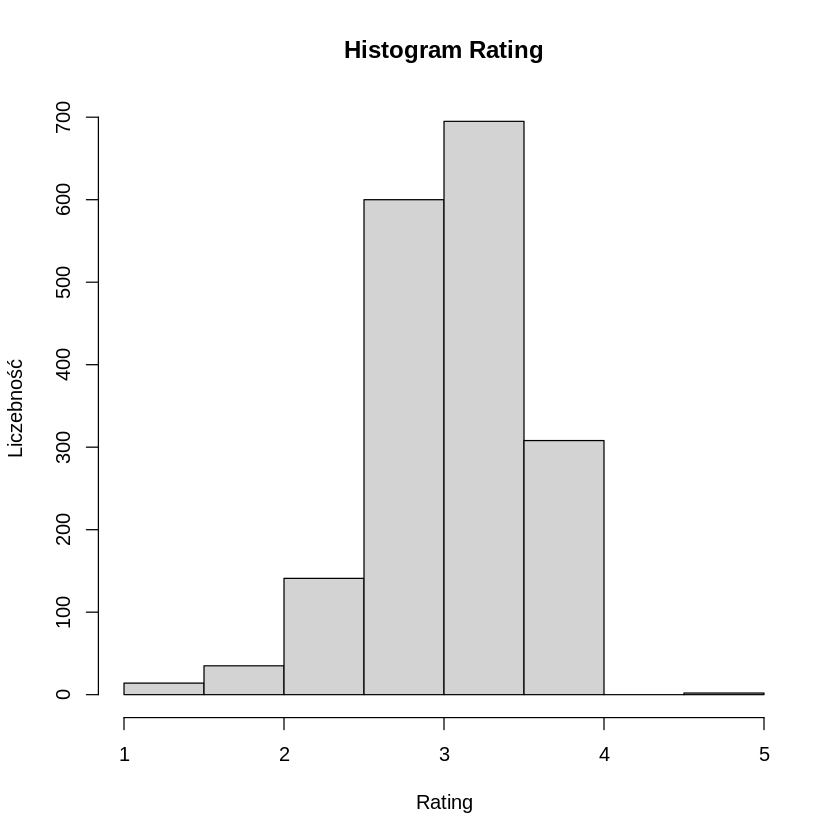

In [ ]:
hist(df$Rating, main = "Histogram Rating", xlab = "Rating", ylab = "Liczebność")

## EDA (Exploratory Data Analysis)
Przeprowadź eksploracyjną analizę danych. Spróbuj zaprezentować tak dane (wykresy lub tabele) aby odpowiedzieć na postawione poniżej pytania.

## PYTANIE 1 - Które kraje są największymi producentemi czekolady?

In [13]:
# Zgrupowanie danych po lokalizacji firmy i obliczenie sumy rekordów
suma_rekordow <- aggregate(df$Company_Location, by=list(df$Company_Location), FUN=length)

# Przypisanie odpowiedniej nazwy kolumny
colnames(suma_rekordow) <- c("Company_Location", "Suma_Rekordow")

# Posortowanie malejąco i wybór pierwszych 10 wyników
posortowane <- head(suma_rekordow[order(suma_rekordow$Suma_Rekordow, decreasing = TRUE), ], 10)

# Usunięcie numerów rekordów
rownames(posortowane) <- NULL

# Wyświetlenie posortowanych wyników
print(posortowane)


   Company_Location Suma_Rekordow
1            U.S.A.           764
2            France           156
3            Canada           125
4              U.K.            96
5             Italy            63
6           Ecuador            54
7         Australia            49
8           Belgium            40
9       Switzerland            38
10          Germany            35


## PYTANIE 2 – Czy ocena zalezy od zawartości kako w czekoladzie?

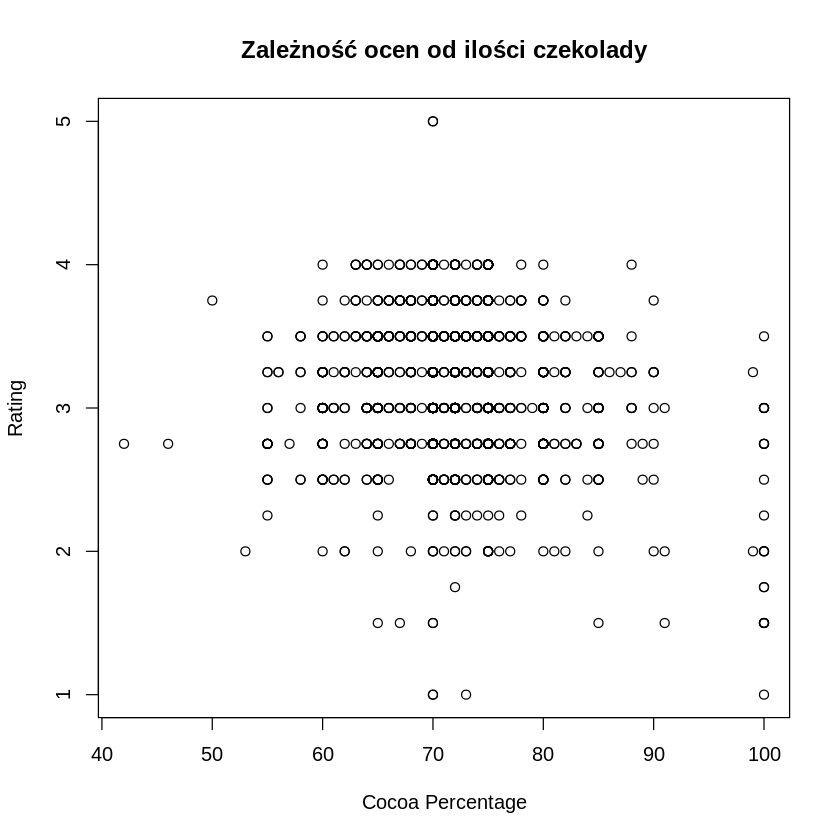

In [ ]:
plot(df$Cocoa_Percentage, df$Rating,
     xlab = "Cocoa Percentage", ylab = "Rating",
     main = "Zależność ocen od ilości czekolady")

## PYTANIE 3 - Jakie są trendy produkcji czekolady zwykłej i gorzkiej na rynku światowym? Czy któryś z tych rodzajów jest bardziej popularny?

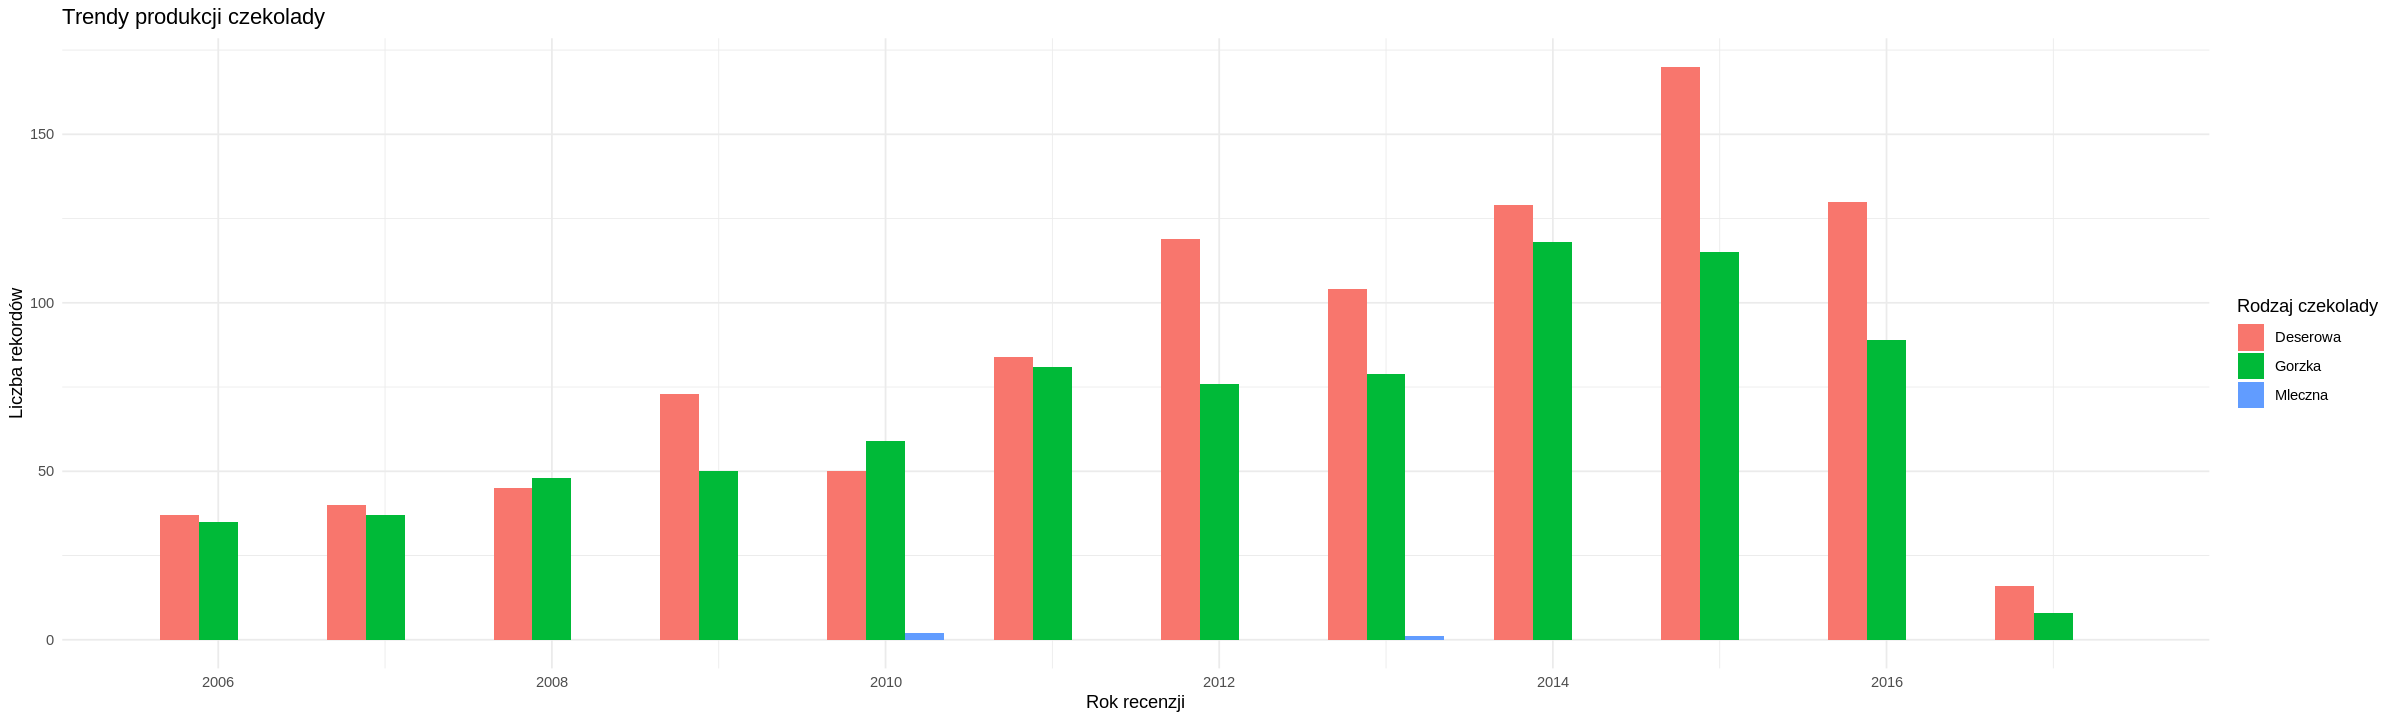

In [33]:
library(ggplot2)

# Ustawienie szerokości słupków
szerokosc_slupkow <- 0.7

# Ustawienie szerszego wykresu
options(repr.plot.width = 20, repr.plot.height = 6)

# Unikalne rodzaje czekolady
unikalne_rodzaje <- unique(df$Chocolate_Type)

# Utworzenie wszystkich kombinacji roku i rodzaju czekolady
wszystkie_kombinacje <- expand.grid(Review_Date = unique(df$Review_Date), Chocolate_Type = unikalne_rodzaje)

# Połączenie danych oryginalnych z wszystkimi kombinacjami
dane_kompletne <- merge(trendy_produkcji, wszystkie_kombinacje, by = c("Review_Date", "Chocolate_Type"), all = TRUE)

# Uzupełnienie brakujących wartości zerami
dane_kompletne[is.na(dane_kompletne)] <- 0

# Utworzenie wykresu słupkowego
wykres <- ggplot(data = dane_kompletne, aes(x = Review_Date, y = REF, fill = Chocolate_Type)) +
          geom_col(position = "dodge", width = szerokosc_slupkow) +
          labs(title = "Trendy produkcji czekolady",
               x = "Rok recenzji",
               y = "Liczba rekordów",
               fill = "Rodzaj czekolady") +
          theme_minimal() +
          scale_x_continuous(breaks = seq(min(dane_kompletne$Review_Date), max(dane_kompletne$Review_Date), by = 2))

# Wyświetlenie wykresu
print(wykres)




## PYTANIE 4 - Który kraj ma najwyższe oceny czekolady?

In [34]:
# Obliczanie średniej oceny czekolady dla każdego kraju
srednia_ocena <- aggregate(df$Rating, by=list(df$Company_Location), FUN=mean)

# Zmiana nazw kolumn
colnames(srednia_ocena) <- c("Kraj", "Srednia_Ocena_Czekolady")

# Ograniczenie wyników do pierwszych 10 krajów
srednia_ocena_10 <- head(srednia_ocena, 10)

# Wyświetlenie wyników
print(srednia_ocena_10)


        Kraj Srednia_Ocena_Czekolady
1  Amsterdam                3.500000
2  Argentina                3.305556
3  Australia                3.357143
4    Austria                3.240385
5    Belgium                3.093750
6    Bolivia                3.250000
7     Brazil                3.397059
8     Canada                3.324000
9      Chile                3.750000
10  Colombia                3.173913


## PYTANIE 6 – Jak zmieniały się oceny różnych rodzajów czekoladek na przestrzeni czasu?

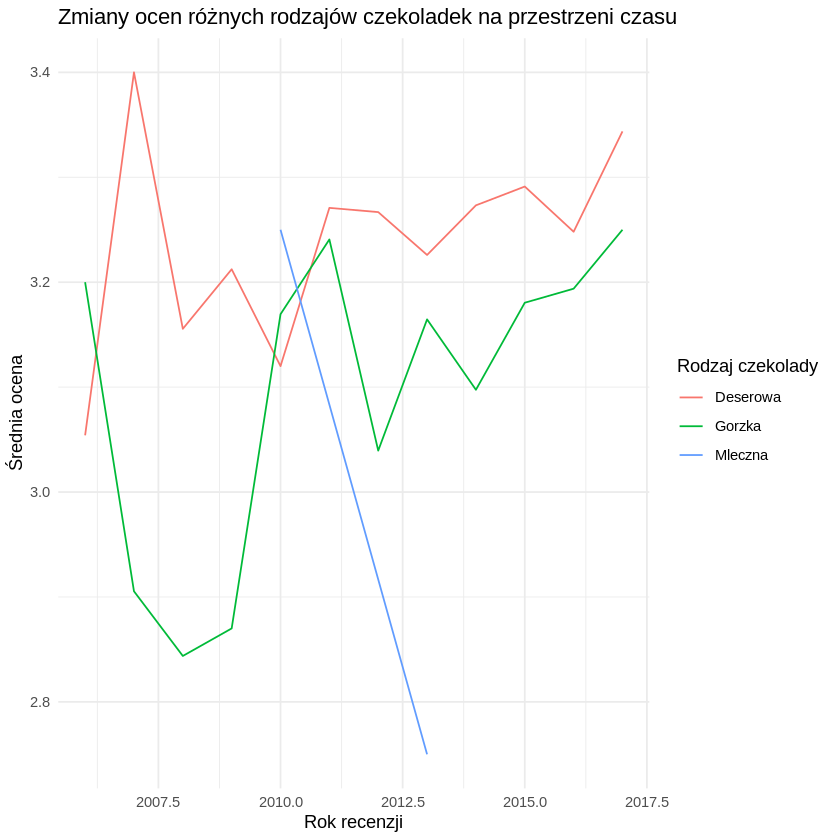

In [ ]:
# Załadowanie pakietu ggplot2
library(ggplot2)

# Pogrupowanie danych według roku recenzji i rodzaju czekolady oraz obliczenie średniej oceny (Rating)
srednie_oceny <- aggregate(df$Rating, by=list(Review_Date=df$Review_Date, Chocolate_Type=df$Chocolate_Type), FUN=mean)

# Utworzenie wykresu liniowego dla każdego rodzaju czekolady
wykres <- ggplot(data = srednie_oceny, aes(x = Review_Date, y = x, color = Chocolate_Type)) +
          geom_line() +
          labs(title = "Zmiany ocen różnych rodzajów czekoladek na przestrzeni czasu",
               x = "Rok recenzji",
               y = "Średnia ocena",
               color = "Rodzaj czekolady") +
          theme_minimal()

# Wyświetlenie wykresu
print(wykres)

# Wnioski

W roku 2015 wystapila najwysza produkcja czekolady, potem nastapil spadek. W latach 2007-2019 notujemy dolek produkcji czekolady gorzkiej i w roku 2008 nagly szczyt produkcji deserowej. W 2010 na chwile pojawia sie mleczna aby zniknac zaraz potem z rynku

##Pobierz plik (R_Zadanie_2_imię_nazwisko.jpynb) i prześlij na upel.